<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/luisa_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import pandas as pd
# import pickle
# import seaborn as sns

# import matplotlib.pyplot as plt

# from nltk.stem import SnowballStemmer
# from wordcloud import WordCloud 

# import re

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
#import sqlalchemy as sql
import datetime

from PIL import Image 

import pickle

# !pip install -q streamlit

In [ ]:
# name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t')[['nconst','primaryName','primaryProfession']]


In [ ]:

# df = pd.read_csv('myfile.csv',skiprows=lambda x: x not in rownumberList)

# title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t')[['tconst','nconst']]

In [ ]:
col_list = ['nconst','primaryName','primaryProfession']


name_b = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list)


In [ ]:
col_list2 = ['tconst','nconst']
# rownumberList = [1,2,3]
title_p = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list2)
# df = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz',skiprows=lambda x: x not in rownumberList)
# # , skiprows=lambda x: x not in rownumberList)



In [ ]:
# # options = ['tt0111161', 'tt0468569','tt1375666','tt0137523','tt0109830','tt0110912','tt0068646','tt0133093','tt0167260','tt0120737'] 
    
# # selecting rows based on condition 
# rslt_df = title_p[title_p['tconst'].isin(options)] 
    
# print('\nResult title_p :\n',
#       rslt_df)


Result title_p :
              tconst     nconst
578329    tt0068646  nm0722000
578330    tt0068646  nm0000008
578331    tt0068646  nm0000199
578332    tt0068646  nm0001001
578333    tt0068646  nm0000473
...             ...        ...
18854560  tt1375666  nm0634240
18854566  tt1375666  nm0858799
18854567  tt1375666  nm0001877
18854573  tt1375666  nm0002892
18854574  tt1375666  nm0809059

[100 rows x 2 columns]


In [ ]:
# other = pd.DataFrame({'title_p': ['tconst', 'nconst'],
#                       'name_b': ['nconst', 'primaryName', 'primaryProfession']})

# result = pd.concat([rslt_df, name_b], axis=1, join="outer")

top_movies= pd.merge(title_p, name_b, how='inner', on=['nconst', 'nconst'])



In [ ]:
col_list3 = ['tconst','averageRating','numVotes']
title_ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list3)

In [ ]:
top_movies2= pd.merge(top_movies5, title_ratings, how='inner', on=['tconst', 'tconst'])

In [ ]:
top_movies['wheighted'] = (top_movies['averageRating']*top_movies['numVotes'])/top_movies['numVotes'].sum()
top_movies.sort_values(by=('wheighted'), ascending=False).head(10)

# top_movies.sort_values(by=(['averageRating','wheighted']), ascending=[False,False])


,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
1200525,tt0111161,nm0005683,Roger Deakins,"cinematographer,camera_department,miscellaneous",9.3,2655549,0.001933
1200526,tt0111161,nm0000151,Morgan Freeman,"actor,producer,soundtrack",9.3,2655549,0.001933
1200528,tt0111161,nm0290358,Richard Francis-Bruce,"editor,editorial_department,sound_department",9.3,2655549,0.001933
1200529,tt0111161,nm0348409,Bob Gunton,"actor,soundtrack",9.3,2655549,0.001933
1200530,tt0111161,nm0001104,Frank Darabont,"writer,producer,director",9.3,2655549,0.001933
1200531,tt0111161,nm0002353,Thomas Newman,"music_department,composer,soundtrack",9.3,2655549,0.001933
1200532,tt0111161,nm0000209,Tim Robbins,"actor,producer,director",9.3,2655549,0.001933
1200533,tt0111161,nm0006669,William Sadler,"actor,soundtrack,producer",9.3,2655549,0.001933
1200527,tt0111161,nm0000175,Stephen King,"writer,producer,actor",9.3,2655549,0.001933
1200534,tt0111161,nm0555550,Niki Marvin,"producer,director,writer",9.3,2655549,0.001933


In [ ]:
col_list4 = ['tconst','genres']
title_basics = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', compression = 'gzip', sep = '\t', usecols=col_list4)

In [ ]:
top_movies24= pd.merge(top_movies2, title_basics, how='inner', on=['tconst', 'tconst'])

In [ ]:
top_movies24.to_pickle('/content/topm16.pickle')

In [ ]:
top_movies2 = pd.read_pickle("/content/topm16.pickle")

In [ ]:
top_movies2["primaryProfession"] = top_movies2.primaryProfession.str.split(',')
top_movies2_split = top_movies2.explode("primaryProfession")

In [ ]:
top_movies2_split.to_pickle('/content/topm17.pickle')

In [3]:
top_movies = pd.read_pickle("/content/topm14.pickle")

In [4]:
top_movies

,tconst,nconst,primaryName,primaryProfession,averageRating,numVotes,wheighted
0,tt0000001,nm1588970,Carmencita,soundtrack,5.7,1921,8.568788e-07
1,tt0000001,nm0005690,William K.L. Dickson,"cinematographer,director,producer",5.7,1921,8.568788e-07
2,tt0000001,nm0374658,William Heise,"cinematographer,director,producer",5.7,1921,8.568788e-07
3,tt0000005,nm0005690,William K.L. Dickson,"cinematographer,director,producer",6.2,2543,1.233830e-06
4,tt0000005,nm0443482,Charles Kayser,actor,6.2,2543,1.233830e-06
...,...,...,...,...,...,...,...
10364921,tt9914342,nm10537168,Adrien Montier,"director,writer",6.2,5,2.425933e-09
10364922,tt9914342,nm10537169,Maryline Peyrichoux,director,6.2,5,2.425933e-09
10364923,tt9914342,nm10537170,Léa Vera Toro,"director,writer",6.2,5,2.425933e-09
10364924,tt9914342,nm10537171,Maryline Perychoux,writer,6.2,5,2.425933e-09


In [ ]:
# top_movies[['g1', 'g2', 'g3']] = top_movies['genres'].str.split(',', expand=True)

In [6]:
condition = top_movies['primaryProfession'] == 'actor'
# condition2 = top_movies2['P2'] == 'actor' 
# condition3 = top_movies2['P3'] == 'actor'
# top_movies2_split = top_movies2.explode("primaryProfession")

actors = top_movies[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# actors = top_movies2[condition | condition2 | condition3][['nconst','primaryName','tconst','averageRating','wheighted','P1','P2','P3']]
# actors['primaryName'].value_counts()
# t_a = actors.sort_values(by=['wheighted'],ascending=False).head(10)



# actors.pivot_table(index = 'primaryName', values = ['averageRating','tconst'], aggfunc = {'averageRating':'mean','tconst': 'count'}).sort_values(by=['averageRating','tconst'],ascending=False)

# # actors['tconst'].value_counts()

In [ ]:
# topactors = actors.sort_values(by=('wheighted'), ascending=False).head(100)
# topactors

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
1200532,nm0006669,William Sadler,tt0111161,9.3,0.001933,actor
1200525,nm0000151,Morgan Freeman,tt0111161,9.3,0.001933,actor
1200526,nm0000175,Stephen King,tt0111161,9.3,0.001933,actor
1200528,nm0348409,Bob Gunton,tt0111161,9.3,0.001933,actor
1200531,nm0000209,Tim Robbins,tt0111161,9.3,0.001933,actor
...,...,...,...,...,...,...
4881325,nm0913300,David Wasco,tt0361748,8.3,0.000932,actor
4881326,nm0004744,Lawrence Bender,tt0361748,8.3,0.000932,actor
4881327,nm0000093,Brad Pitt,tt0361748,8.3,0.000932,actor
4881328,nm0000233,Quentin Tarantino,tt0361748,8.3,0.000932,actor


In [ ]:
actors["averageRating"].mean()


6.915574784655778

In [7]:
condition2 = actors['averageRating'] > actors["averageRating"].mean()


t_actors = actors[condition2][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [ ]:
t_actors[['g1', 'g2', 'g3']] = t_actors['genres'].str.split(',', expand=True)

In [8]:
t_actors

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
1285,nm0614526,Michael Murphy,tt4038052,7.7,4.338508e-08,actor
1295,nm0285678,Henry Ford,tt4381018,7.2,1.803016e-08,actor
1296,nm0614526,Michael Murphy,tt4381018,7.2,1.803016e-08,actor
1300,nm3358008,Jonathan Cann,tt4612156,7.6,1.784235e-08,actor
1306,nm2096532,Colin Devine,tt4612156,7.6,1.784235e-08,actor
...,...,...,...,...,...,...
10364873,nm10500066,Evan Brodsky,tt9834314,8.2,3.208493e-09,actor
10364908,nm12246106,Reyhan Rahmana Nugroho,tt9881586,9.0,2.394631e-07,actor
10364910,nm10532893,Patrick Hoffmann,tt9903952,7.0,5.477914e-09,actor
10364912,nm10548027,Holger Düsterhöft,tt9903952,7.0,5.477914e-09,actor


In [10]:
# actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 

# top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)
# top

actorst = t_actors.groupby('primaryName')['tconst'].count().reset_index(name='count_actors_movie') 
tp = actorst.sort_values(by=('count_actors_movie'), ascending=False)

top = actorst.sort_values(by=('count_actors_movie'), ascending=False).head(10)




[Text(0, 0.5, 'Actors'), Text(0.5, 0, 'Nº movies')]

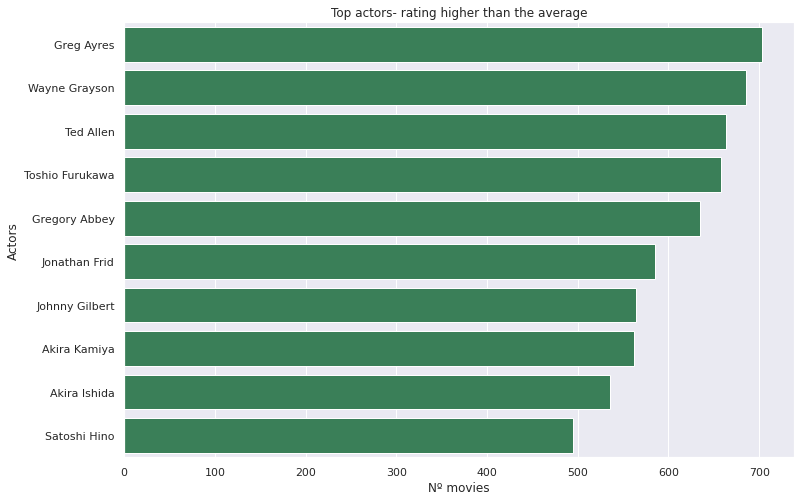

In [11]:
sns.set(rc={'figure.figsize':(12,8)})
# sns.set_palette("pastel")
# sns.barplot(data=top, y="primaryName", x="count_actors_movie")

# sns.barplot(data=top, y="primaryName", x="count_actors_movie")
# ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie", hue= 'g3')

ax = sns.barplot(data=top, y="primaryName", x="count_actors_movie",color="seagreen")
ax.set(title = 'Top actors- rating higher than the average')
ax.set(xlabel='Nº movies', ylabel='Actors')

In [14]:
actor = str(input("Choose an actor "))
result=tp.loc[tp['primaryName']==actor, 'count_actors_movie']
if result.empty:
  print("actor is not on the list")
else:
  print(result)

Choose an actor Ted Allen
166455    663
Name: count_actors_movie, dtype: int64


In [ ]:
# actor = str(input("Choose an actor: "))
# def actor(a):
#     return count_actors_movie
# top['actor'] = books['authors'].apply(n_authors)
# books.head()

In [ ]:
# actor = str(input("Choose an actor "))
# vowels = top['primaryName']
# for i in actor:
#     if i in vowels:
#         actor = "count_actors_movie"
#     else :
#         print('N')
# print (actor) 
# Stephen Colbert


# df1 = df1.set_index('ID')	
# actor = str(input("Choose an actor "))
# if actor == top.loc[top['primaryName']]:
#   print('hi')
#   #  print(actors.loc[actors['averageRating']])
# else:
#    print("Okay...?")

# actor = str(input("Choose an actor "))
# def stream_half(primaryName,averageRating):
#     if actor == top.loc[top['primaryName']]:
#         return (actors.loc[actors['averageRating']])
#     else:
#         return ("Okay...?")
        
# actor = str(input("Choose an actor "))
# if actor == top.loc[top['primaryName']]:
#   print(top.loc[top['count_actors_movie']])
# else:
#   print ('hi')

# actors['Total'] = np.where(actors['primaryName'] == actor, actors['averageRating'] , 0)

Choose an actor Stephen Colbert


KeyError: ignored

In [ ]:
top_actors = actors.sort_values(by=['wheighted'],ascending=False).head(10)

In [ ]:
top_actors

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
1200532,nm0006669,William Sadler,tt0111161,9.3,0.001933,actor
1200525,nm0000151,Morgan Freeman,tt0111161,9.3,0.001933,actor
1200526,nm0000175,Stephen King,tt0111161,9.3,0.001933,actor
1200528,nm0348409,Bob Gunton,tt0111161,9.3,0.001933,actor
1200531,nm0000209,Tim Robbins,tt0111161,9.3,0.001933,actor
1170409,nm0005132,Heath Ledger,tt0468569,9.0,0.001851,actor
1170410,nm0001173,Aaron Eckhart,tt0468569,9.0,0.001851,actor
1170406,nm0000288,Christian Bale,tt0468569,9.0,0.001851,actor
1170404,nm0000323,Michael Caine,tt0468569,9.0,0.001851,actor
4981243,nm0680983,Elliot Page,tt1375666,8.8,0.001604,actor


In [ ]:
condition = top_movies2_split['primaryProfession'] == 'actress'
# condition2 = top_movies5['P2'] == 'actress' 
# condition3 = top_movies5['P3'] == 'actress'

actress= top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# actress = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
# actress['primaryName'].value_counts()

In [ ]:
actress

,nconst,primaryName,tconst,averageRating,wheighted,primaryProfession
70,nm0600903,Annabelle Moore,tt0154151,6.0,6.197868e-08,actress
73,nm0600903,Annabelle Moore,tt0154152,6.5,1.147036e-06,actress
112,nm0600903,Annabelle Moore,tt0203883,5.7,1.583508e-07,actress
128,nm1032325,Roma T. Roma,tt0205121,5.4,9.296801e-09,actress
154,nm0600903,Annabelle Moore,tt0229217,5.9,4.344689e-07,actress
...,...,...,...,...,...,...
10364932,nm10572383,Deborah Joseph,tt9827740,8.5,5.321401e-09,actress
10364944,nm10520853,Alicia Skater,tt9869906,3.4,2.660701e-09,actress
10364945,nm10523751,Lunari Rae,tt9869906,3.4,2.660701e-09,actress
10364967,nm10523328,Alexandra Begau,tt9881050,3.2,4.257121e-09,actress


In [ ]:
condition3 = actress['averageRating'] > actress["averageRating"].mean()

t_actress = actress[condition3][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

actress_t = t_actress.groupby('primaryName')['tconst'].count().reset_index(name='count_actress_movie') 

top_w = actress_t.sort_values(by=('count_actress_movie'), ascending=False).head(10)
top_w

,primaryName,count_actress_movie
63354,Faye Peters,1423
70582,Grey Griffin,1361
109690,Laura Bailey,1188
194257,Tia Lynn Ballard,950
67353,Genevieve Howard,938
120337,Luci Christian,853
191662,Tara Strong,811
165919,Rie Kugimiya,784
19210,Arlene Francis,783
96420,Kana Hanazawa,769


[Text(0, 0.5, 'Actress'), Text(0.5, 0, 'Nº movies')]

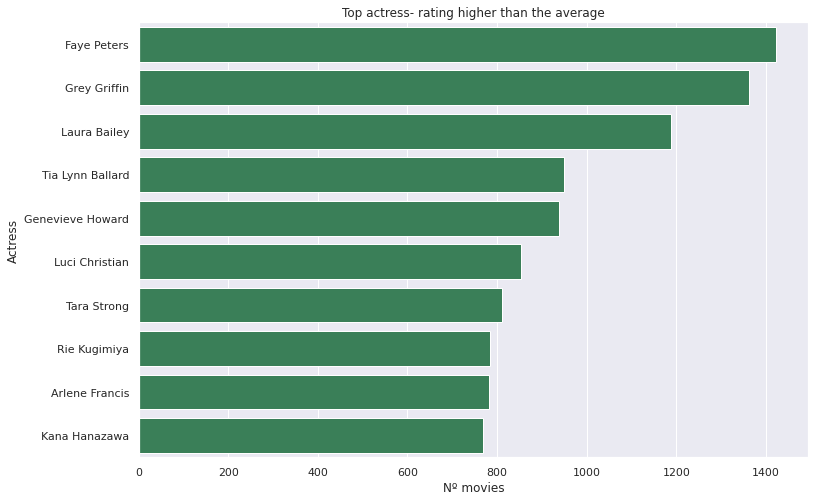

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax2 = sns.barplot(data=top_w, y="primaryName", x="count_actress_movie",color="seagreen")
ax2.set(title = 'Top actress- rating higher than the average')
ax2.set(xlabel='Nº movies', ylabel='Actress')


In [ ]:
condition4 = top_movies2_split['primaryProfession'] == 'producer'
producer = top_movies2_split[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [ ]:
condition4 = producer['averageRating'] > producer["averageRating"].mean()
t_producer = producer[condition4][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [ ]:
top_p = t_producer.groupby('primaryName')['tconst'].count().reset_index(name='count_producer_movie') 

top_p = top_p.sort_values(by=('count_producer_movie'), ascending=False).head(10)


[Text(0, 0.5, 'Producer'), Text(0.5, 0, 'Nº movies')]

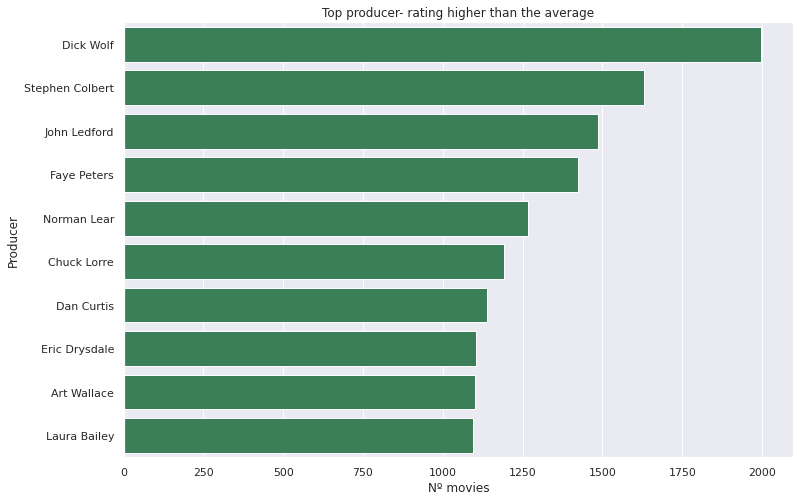

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax3 = sns.barplot(data=top_p, y="primaryName", x="count_producer_movie",color="seagreen")
ax3.set(title = 'Top producer- rating higher than the average')
ax3.set(xlabel='Nº movies', ylabel='Producer')

In [ ]:
condition = top_movies2_split['primaryProfession'] == 'director'
# condition2 = top_movies5['P2'] == 'director'
# condition3 = top_movies5['P3'] == 'director'

director = top_movies2_split[condition][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

# director = top_movies5[condition | condition2 | condition3][['nconst','primaryName','tconst']]
director['primaryProfession'].value_counts()

director    2265497
Name: primaryProfession, dtype: int64

In [ ]:
condition6 = director['averageRating'] > director["averageRating"].mean()
t_director = director[condition6][['nconst','primaryName','tconst','averageRating','wheighted','primaryProfession']]

In [ ]:
director_t = t_director.groupby('primaryName')['tconst'].count().reset_index(name='count_director_movie') 

top_d = director_t.sort_values(by=('count_director_movie'), ascending=False).head(10)
top_d

,primaryName,count_director_movie
49564,Eric Drysdale,1226
35333,Dan Curtis,1183
44301,Donald P. Bellisario,1053
27834,Charles Marquis Warren,1037
72945,James Rolfe,855
176213,William Hanna,854
85699,Joseph Barbera,842
72294,James Burrows,836
60853,Greg Berlanti,835
31527,Chuck O'Neil,831


[Text(0, 0.5, 'Director'), Text(0.5, 0, 'Nº movies')]

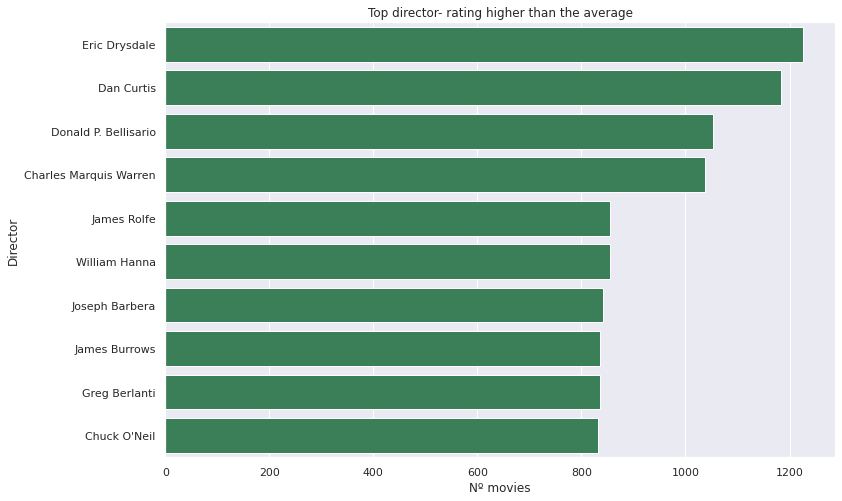

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
ax2 = sns.barplot(data=top_d, y="primaryName", x="count_director_movie",color="seagreen")
ax2.set(title = 'Top director- rating higher than the average')
ax2.set(xlabel='Nº movies', ylabel='Director')

In [ ]:
!streamlit run /content/streamlit_app.py & npx localtunnel — port 8501 

[############......] - refresh-package-json:localtunnel: timing action:finalize

npx: installed 22 in 3.478s
Usage: lt --port [num] <options>

Options:
  -p, --port                Internal HTTP server port                 [required]
  -h, --host                Upstream server providing forwarding
                                             [default: "https://localtunnel.me"]
  -s, --subdomain           Request this subdomain
  -l, --local-host          Tunnel traffic to this host instead of localhost,
                            override Host header to this host
      --local-https         Tunnel traffic to a local HTTPS server     [boolean]
      --local-cert          Path to certificate PEM file for local HTTPS server
      --local-key           Path to certificate key file for local HTTPS server
      --local-ca            Path to certificate authority file for self-signed
                            certificates
      --allow-invalid-cert  Disable certificate checks for your local